In [2]:
import pandas as pd

# Load the data
members = pd.read_csv('data/pp_members.csv')
recipes = pd.read_csv('data/pp_recipes.csv')
reviews = pd.read_csv('data/pp_reviews.csv')


/tmp/ipykernel_17321/71959988.py:5: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  recipes = pd.read_csv('data/pp_recipes.csv')
/tmp/ipykernel_17321/71959988.py:6: DtypeWarning: Columns (4,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('data/pp_reviews.csv')


In [3]:
reviews

,Unnamed: 0,member_id,recipe_id,rating,text,likes,last_modified_date,review_id,review_url,member_url,new_member_id,new_recipe_id
0,0,192799,96347,5.0,"I've never made ham & beans before, but I've a...",0.0,2005-05-02,171462.0,https://www.food.com/recipe/crock-pot-ham-and-...,https://www.food.com/user/192799,0,274797
1,1,394617,37139,2.5,Great curry. Will make again. I was thinking...,0.0,2012-03-25,1296592.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/394617,1,274880
2,2,170674,37139,5.0,This was really good even my picky kid loved i...,0.0,2011-10-03,1254955.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/170674,2,274880
3,3,1800369,37139,5.0,I used chicken base instead of beef bullion an...,0.0,2011-01-20,1184045.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/1800369,3,274880
4,4,126440,37139,5.0,I made half a recipe and it was just right for...,0.0,2010-12-24,1174963.0,https://www.food.com/recipe/curry-chicken-with...,https://www.food.com/user/126440,4,274880
...,...,...,...,...,...,...,...,...,...,...,...,...
1916419,1916419,53959,161672,6.0,NaN,NaN,2021-07-20,NaN,NaN,NaN,1118,507330
1916420,1916420,461724,242936,6.0,NaN,NaN,2009-09-09,NaN,NaN,NaN,878,507331
1916421,1916421,47175,51384,6.0,NaN,NaN,2012-04-07,NaN,NaN,NaN,12418,507332
1916422,1916422,335392,406042,6.0,NaN,NaN,2010-06-23,NaN,NaN,NaN,133034,507333


In [4]:
#ingredients_raw = pd.read_csv('graph_ingredient_mapping.csv')
#ingredients_raw

In [5]:

import json
import ast

# x for the row, ing_or_quant for the result column to return, ingredients (0) or their quantities (1)
def ing_process(x, ing_or_quant):

    try: 
        ing_list = ast.literal_eval(x)
    except:
        print(x)
        return None    

    try:
        res = list(ing_list.values())[0]
    except:
        print(ing_list)
        return None
    
    # for the ingredients return the 
    

    return [x[ing_or_quant] for x in res]


#recipe_raw = recipes['ingredients'][0]

# replace single with double quotes
#recipe_raw = recipe_raw.replace('\'', '"')

#ing_list = ast.literal_eval(recipe_raw)

#ing_list = list(ing_list.values())[0]

#ing_list

# copy this process for all rows of that column in recipes, to turn it into a new column of list of ingredients, and possibly a new column of list of quantities

recipes['ingredients_pp'] = recipes['ingredients'].apply(ing_process, args=(0,))

#recipe = json.loads(recipe_raw)

{}
nan
nan


In [6]:
#column for the ingredients list

recipes['ingredients_pp']
recipes['ingredients_pp'][0]

['popcorn, popped',
 'dried cranberries',
 'whole almond',
 'butter',
 'brown sugar, packed',
 'corn syrup (light color)',
 'orange juice',
 'vanilla',
 'baking soda']

In [7]:
# column for quantities

recipes['quantities_pp'] = recipes['ingredients'].apply(ing_process, args=(1,))

recipes['quantities_pp']

{}
nan
nan


0         [12  time(s) cups , 1  time(s) cup , 0.5 time(...
1         [1 -2  time(s) lb , 2 -3  time(s) , 0.5 time(s...
2         [200  time(s) g , 1  time(s) , 100  time(s) g ...
3         [6  time(s) lbs leg , 0.25 time(s) cup , 3  ti...
4         [1  time(s) , 1  time(s) teaspoon , 2  time(s)...
                                ...                        
507330    [/ time(s) cup , / time(s) cup , 2 time(s) , 3...
507331    [5  time(s) tablespoons , 1  time(s) , 0.5 tim...
507332    [2  time(s) , 1 time(s) (8 ounce) , 1 time(s) ...
507333    [12  time(s) ounces , 1  time(s) lb , 1 time(s...
507334    [4 time(s) (6 ounce) cans , 14  time(s) ounces...
Name: quantities_pp, Length: 507335, dtype: object

In [8]:
from igraph import Graph, plot, RainbowPalette
#empty dataframe with 3 columns, (from, to, weight) of dummydata for edges
links = pd.DataFrame(columns=['from', 'to', 'weight'])

net = Graph.DataFrame(links, directed=True, use_vids=False,vertices=recipes[0:10])

/home/ze/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [9]:
# for each column show the number of na values
# show this column where the val is not na : recipes['normalization_comment']
#recipes['ingredients_pp'].dropna()

# show unique values of a column type
recipes['ingredients_pp'].apply(type).unique()
# get the NoneType rows
recipes[recipes['ingredients_pp'].apply(type) == type(None)]
# drop these values
recipes = recipes.drop(recipes[recipes['ingredients_pp'].apply(type) == type(None)].index)

In [10]:

# Initialize an empty list to store pairs of indices
index_pairs = []

df = recipes[:200]
# Iterate over each row in the DataFrame

ingredients_freq = {}
# frequency of each ingredient save to a dict
for i in range(len(df)):
    for j in range(len(df.iloc[i]['ingredients_pp'])):
        if df.iloc[i]['ingredients_pp'][j] in ingredients_freq:
            ingredients_freq[df.iloc[i]['ingredients_pp'][j]] += 1
        else:
            ingredients_freq[df.iloc[i]['ingredients_pp'][j]] = 1

print("ing freq", ingredients_freq)

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        # Check if there's at least one common element in the lists of the two rows
        intersercts = set(df.iloc[i]['ingredients_pp']).intersection(df.iloc[j]['ingredients_pp'])
        weight = 0
        if intersercts:
            for k in intersercts:
                weight += 1/ingredients_freq[k]
            # If there is, add the pair of indices to the list
            index_pairs.append((df.index[i], df.index[j], weight))
        

# Create a DataFrame from the list of index pairs
pairs_df = pd.DataFrame(index_pairs, columns=['from', 'to','weight'])

# Display the new DataFrame
print(pairs_df)
pairs_df['weight'].unique()




ing freq {'popcorn, popped': 1, 'dried cranberries': 2, 'whole almond': 1, 'butter': 19, 'brown sugar, packed': 2, 'corn syrup (light color)': 1, 'orange juice': 7, 'vanilla': 10, 'baking soda': 6, 'shelled and cooked shrimp (50-60 count is good)': 1, 'large tomatoes, chopped': 1, 'small white onions, chopped or 2 green onions': 1, 'cilantro, slightly chopped': 1, 'jalapeno, diced, with seeds': 1, 'avocado, chopped': 1, 'tomato juice': 2, 'lime juice': 6, 'salt and pepper': 9, 'garlic salt': 3, 'cream': 2, 'vanilla bean': 1, 'sugar': 30, 'yolks': 6, 'gelatin': 2, 'cold water': 4, 'mascarpone cheese': 2, 'cream cheese (30 percent fat)': 1, 'cream cheese (9 percent fat)': 1, 'of lamb': 1, 'dried mint flakes': 1, 'dried rosemary': 1, 'dried oregano': 5, 'red wine': 2, 'honey': 9, 'medium lemons, cut in half': 1, 'salt and pepper (to taste)': 1, 'egg, beaten': 4, 'toasted sesame oil': 1, 'soy sauce': 5, 'fine dry breadcrumb': 1, 'chopped peanuts': 1, 'green onions, thinly sliced': 1, 'shre

array([0.05263158, 0.14285714, 0.16666667, 0.26666667, 0.1       ,
       0.5       , 0.33333333, 0.11111111, 0.03333333, 0.25      ,
       0.2       , 0.28333333, 0.45      , 0.31111111, 0.2       ,
       0.4       , 0.28571429, 0.25263158, 0.19548872, 0.01886792,
       0.05882353, 0.07769145, 0.13032303, 0.0714995 , 0.125     ,
       0.08553459, 0.05220126, 0.11886792, 0.21886792, 0.06666667,
       0.36886792, 0.30220126, 0.3       , 0.55263158, 0.21111111,
       0.15263158, 0.16374269, 0.21428571, 0.20952381, 0.07142857,
       0.13809524, 0.53333333, 0.35220126, 0.51886792, 0.17763158,
       0.11145511, 0.30882353, 0.45882353, 0.18382353, 0.11929825,
       0.81666667, 0.1254902 , 0.66666667, 0.41666667, 0.45      ,
       0.04166667, 0.075     , 0.26886792, 0.44435812, 0.27769145,
       0.21886792, 0.16172507, 0.51093142, 0.44444444, 0.34920635,
       0.12362983, 0.4047619 , 0.1047619 , 0.0902965 , 0.12997904,
       0.16331237, 0.18553459, 0.16245767, 0.22839173, 0.26245

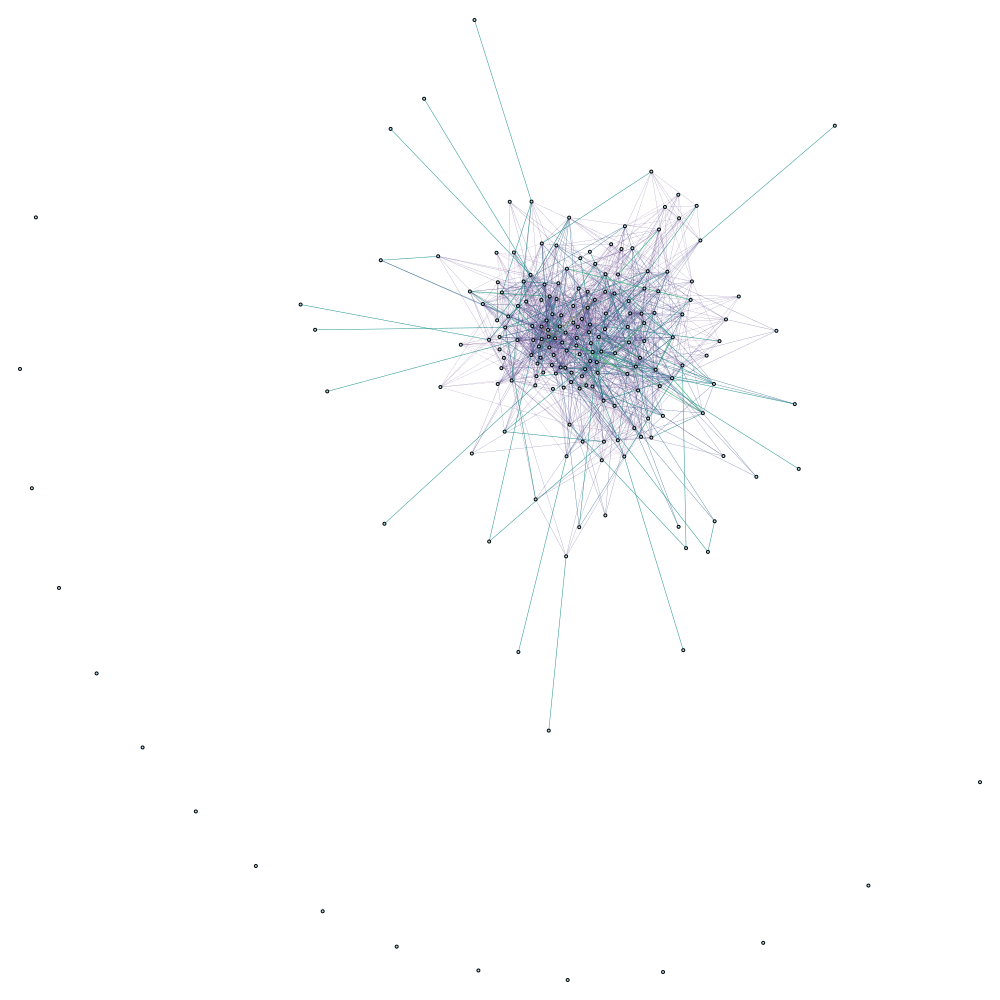

In [11]:
links = pairs_df

import matplotlib.pyplot as plt

net = Graph.DataFrame(links, directed=False, use_vids=False,vertices=df)
#plot(net, vertex_size=3, vertex_color='lightblue',edge_arrow_size=0.4 ,arrow_width=1, edge_width=net.es['weight'], edge_color='grey')
#zoom in on the plot to see the edges

weights = net.es['weight']

# Normalize weights to range between 0 and 1 for color mapping
normalized_weights = [(float(i) - min(weights)) / (max(weights) - min(weights)) for i in weights]

# Use a colormap from matplotlib
cmap = plt.get_cmap('viridis')  # You can change 'viridis' to any colormap you like

# Map normalized weights to colors
colors = [cmap(weight) for weight in normalized_weights]

def rgba_to_hex(rgba):
    r, g, b, a = rgba
    return '#{:02x}{:02x}{:02x}'.format(int(r * 255), int(g * 255), int(b * 255))

hex_colors = [rgba_to_hex(color) for color in colors]

# Convert RGBA colors to HEX format for igraph
#hex_colors = [plt for color in colors]


plot(net, target="plots/graph_ingredients.png" ,vertex_size=3, vertex_color='lightblue',edge_arrow_size=0.4 ,arrow_width=1, edge_width=net.es['weight']*10, edge_color=hex_colors, bbox=(0,0,1000,1000))    

In [35]:
# cluster detection algorithm
clusters = net.community_multilevel(weights=net.es['weight'])

print(clusters)

Clustering with 200 elements and 23 clusters
[ 0] 0, 2, 12, 16, 22, 23, 26, 31, 32, 33, 34, 39, 42, 44, 47, 49, 52, 59, 60,
     62, 64, 70, 75, 76, 77, 79, 83, 84, 95, 103, 108, 109, 110, 111, 113,
     117, 121, 125, 129, 134, 135, 143, 145, 150, 151, 153, 156, 157, 160,
     162, 168, 175, 179, 186, 187, 188, 191, 192, 197, 198
[ 1] 1, 4, 10, 45, 48, 50, 51, 53, 54, 57, 71, 90, 96, 116, 149, 161, 183
[ 2] 3, 7, 9, 11, 19, 24, 25, 36, 43, 61, 63, 65, 68, 78, 87, 101, 106, 107,
     114, 122, 140, 142, 148, 152, 159, 170, 172, 174, 177, 182, 195
[ 3] 5, 13, 18, 46, 69, 72, 82, 89, 92, 100, 102, 118, 119, 126, 128, 130,
     141, 154, 155, 165, 173, 176
[ 4] 6, 8, 14, 17, 20, 21, 27, 28, 29, 30, 35, 37, 38, 40, 56, 58, 67, 74, 80,
     85, 94, 97, 104, 105, 115, 131, 136, 137, 139, 144, 164, 166, 167, 171,
     180, 184, 190, 193
[ 5] 15, 41, 55, 66, 81, 86, 120, 127, 132, 158, 181, 185
[ 6] 73
[ 7] 88, 123, 138, 169
[ 8] 91
[ 9] 93
[10] 98
[11] 99
[12] 112
[13] 124
[14] 133
[15] 146
[

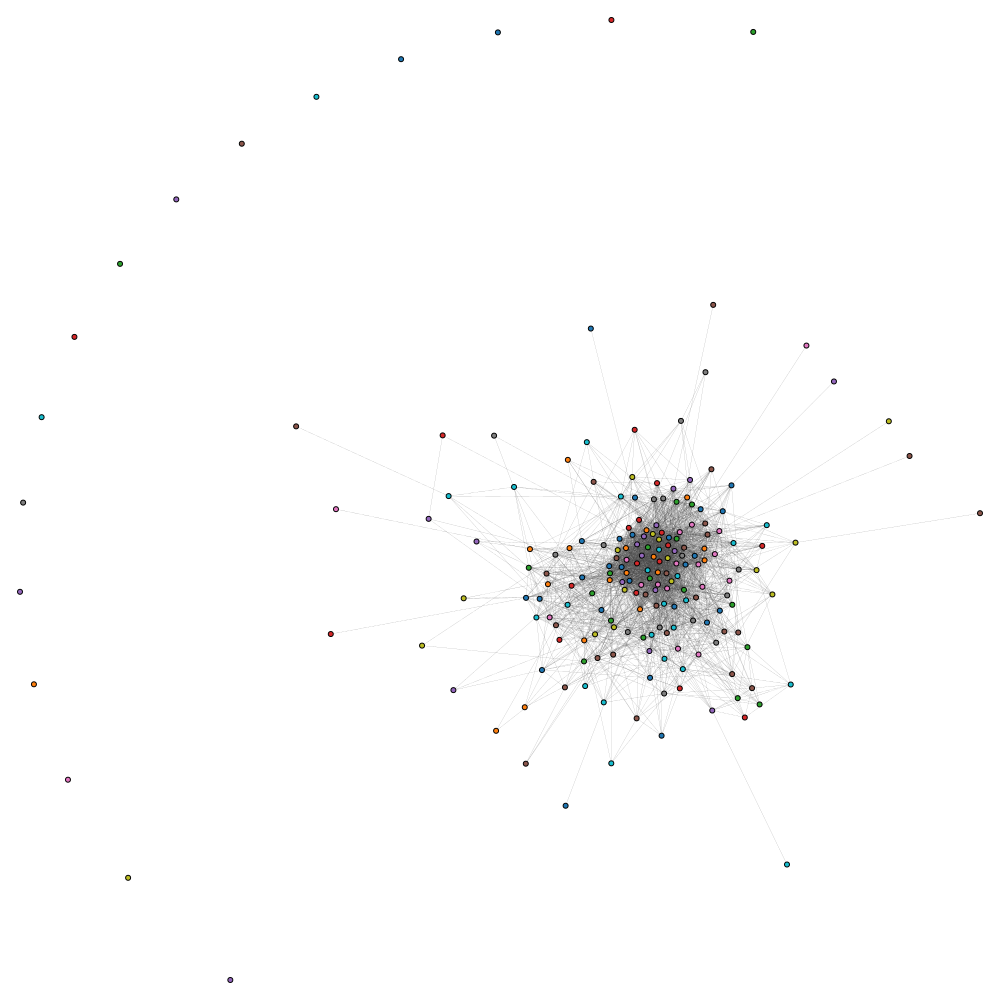

In [42]:
import numpy as np

color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple', 5: 'orange'}  # Add more colors as needed

num_clusters = len(set(clusters.membership))

# Generate random colors for clusters
vertex_colors = [plt.cm.tab10(i) for i in np.linspace(0, 1, num_clusters)]

# Plot the graph with clusters highlighted
plot(net, target="plots/graph_ingredients_clusters.png", vertex_size=5, vertex_color=vertex_colors, edge_width=0.1, edge_arrow_size=0.4 ,arrow_width=1, bbox=(0,0,1000,1000))
